In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [5]:
data1 = data.drop(['Unnamed: 0',"Temp C"],axis = 1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [7]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [8]:
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
data1.drop_duplicates(keep ='first',inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [10]:
data1.rename({'Solar.R': 'Solar'}, axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# impute the missing values 

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar    150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    156 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  154 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ KB


In [13]:
# display data1 missing values count in each column using isnull().sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

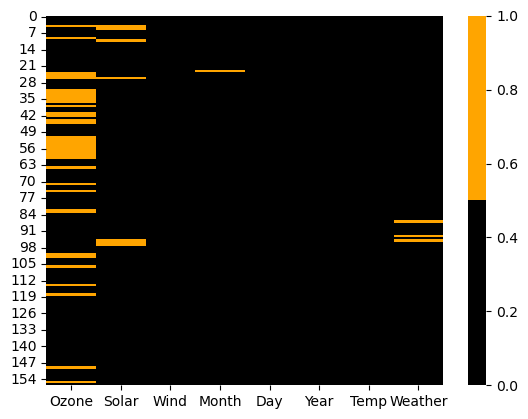

In [14]:
cols = data1.columns
colors = ['black','orange']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [15]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone:",median_ozone)
print("Mean of Ozone:", mean_ozone)

Median of Ozone: 31.0
Mean of Ozone: 41.81512605042017


In [16]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [17]:
median_Solar = data1["Solar"].median()
mean_Solar = data1["Solar"].mean()
print("Median of Solar:",median_Solar)
print("Mean of Ozone:", mean_Solar)

Median of Solar: 199.0
Mean of Ozone: 185.36666666666667


In [18]:
data1['Solar'] = data1['Solar'].fillna(mean_ozone)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [19]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [20]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [21]:
print(data1["Month"].value_counts())
mode_weather = data1["Month"].mode()[0]
print(mode_weather)

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [22]:
data1["Month"] = data1["Month"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

# detection of outliers in the columns

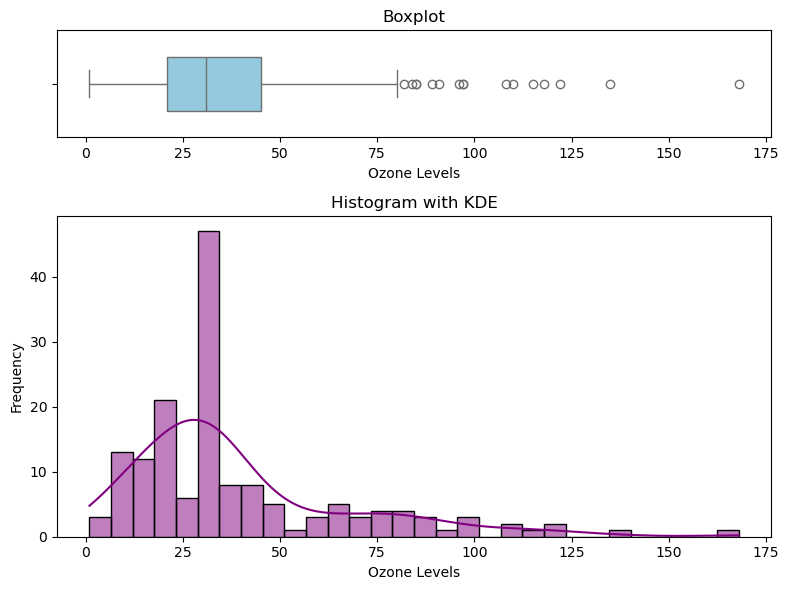

In [24]:
fig,axes = plt.subplots(2,1,figsize=(8,6), gridspec_kw={'height_ratios':[1,3]})
#plot  the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"],ax= axes[0],color='skyblue',width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")


#plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Ozone"],kde=True,ax=axes[1],color='purple',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

# aadjust layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

In [25]:
# observations
# the ozone column has extreme values beyond 81 as seen from box plot
#outlines for the ozone levels are above 81
#the same is confirmed from the below right-skewed histogram

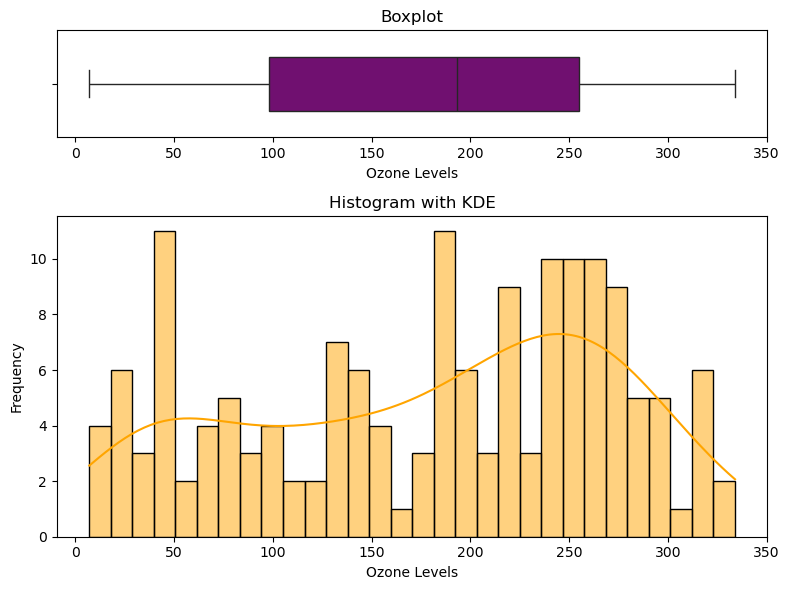

In [26]:
fig,axes = plt.subplots(2,1,figsize=(8,6), gridspec_kw={'height_ratios':[1,3]})
#plot  the boxplot in the first (top) subplot
sns.boxplot(data=data1["Solar"],ax= axes[0],color='purple',width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")


#plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Solar"],kde=True,ax=axes[1],color='orange',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

# aadjust layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

### there are no outlayers in the box plot
### it is  slightly skew to the left

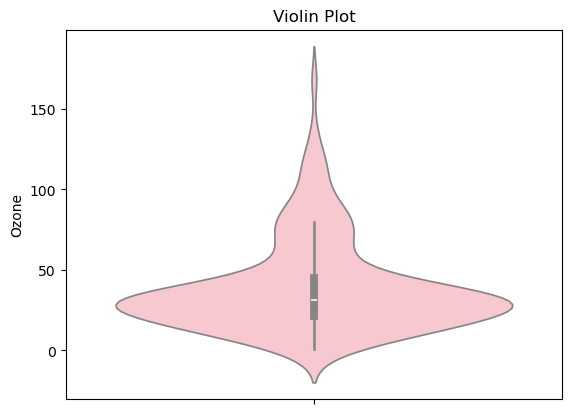

In [28]:
sns.violinplot(data=data1["Ozone"],color = 'pink')
plt.title("Violin Plot")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d66a559940>,
 'caps': [<matplotlib.lines.Line2D at 0x1d66a5ddb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d66a5dd040>],
 'medians': [<matplotlib.lines.Line2D at 0x1d66a5de180>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d66a5de450>],
 'means': []}

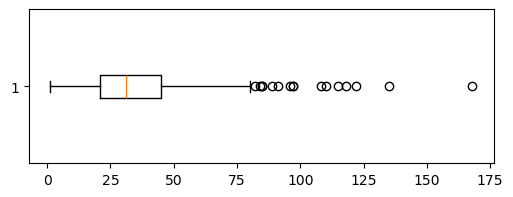

In [29]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"], vert = False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

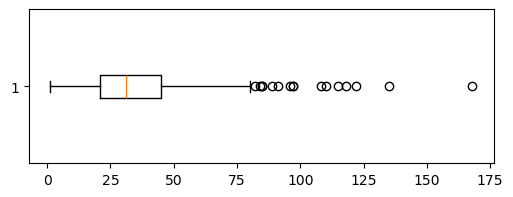

In [30]:
# extract the outliers from the boxplot for ozone column
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"],vert= False)
[item.get_xdata() for item in boxplot_data['fliers']]

## using mu +/- 3*sigma limits (standard deviation method)

In [32]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [33]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)
    

135.0
168.0


C:\Users\nisha\AppData\Local\Temp\ipykernel_22368\2701659469.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\nisha\AppData\Local\Temp\ipykernel_22368\2701659469.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


### observations
##### it is observed that only two outliers are identified using std method 
##### in box plot method more no of outliers are identified
##### this is because the assumption of normality is not satisfied in this column

Text(0.5, 0, 'Theoretical Quantiles')

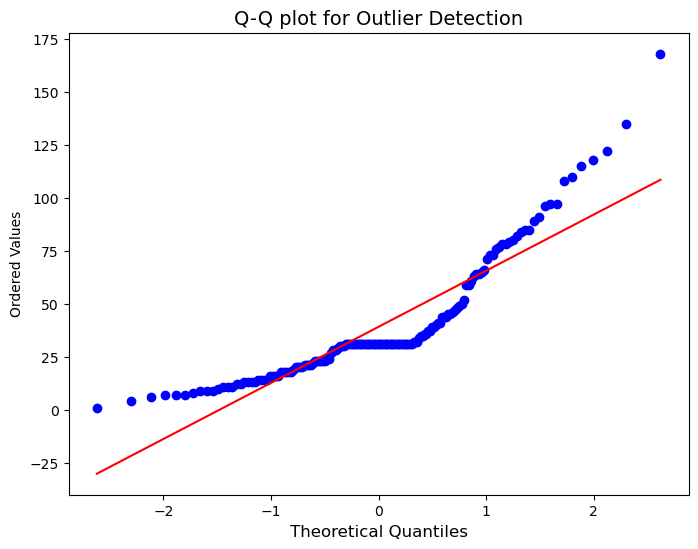

In [35]:
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"], dist = "norm", plot = plt)
plt.title("Q-Q plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

#### observations from Q-Q plot
#### the data does not follow normal distribution as the data points are deviating significantly away from the red line
#### the data shows a right-skewed distribution and possible outliers

Text(0.5, 0, 'Theoretical Quantiles')

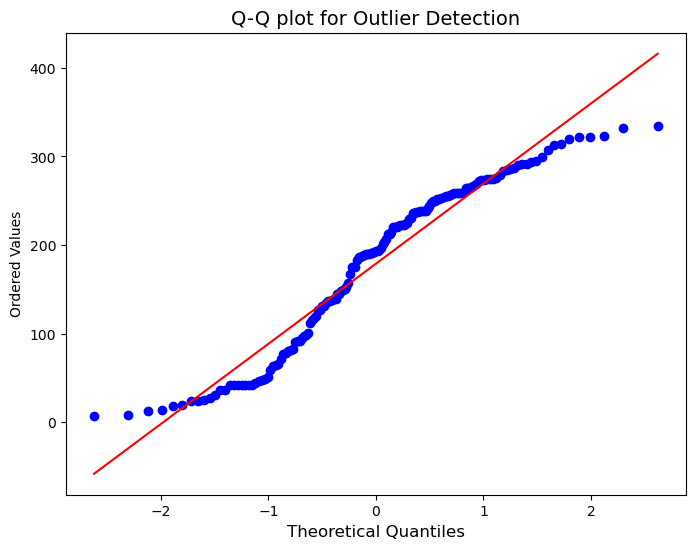

In [37]:
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(data1["Solar"], dist = "norm", plot = plt)
plt.title("Q-Q plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

### observations
data points are almost near to the red line
... data shows the right - skewed 

## Other visualizations that could help understand the data 

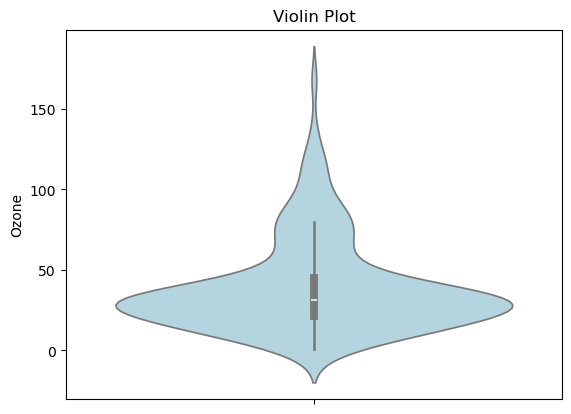

In [40]:
sns.violinplot(data=data1["Ozone"],color = 'lightblue')
plt.title("Violin Plot")
plt.show()

C:\Users\nisha\AppData\Local\Temp\ipykernel_22368\2064756043.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y="Ozone",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

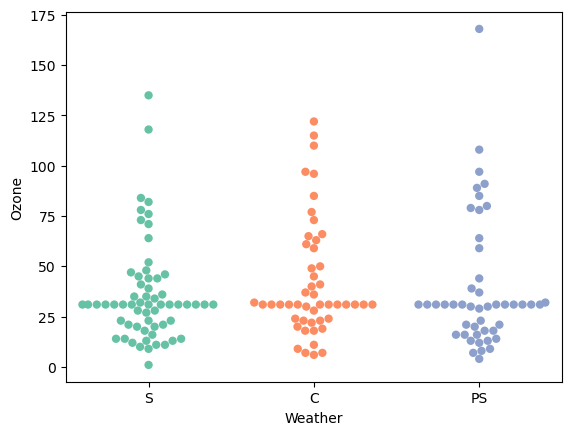

In [41]:
sns.swarmplot(data=data1, x = "Weather", y="Ozone",color="orange",palette="Set2",size=6)
#plt.title("Swarm Plot")

C:\Users\nisha\AppData\Local\Temp\ipykernel_22368\149164939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x ="Weather", y = "Ozone", color="orange", palette="Set1", size=6, jitter= True)


<Axes: xlabel='Weather', ylabel='Ozone'>

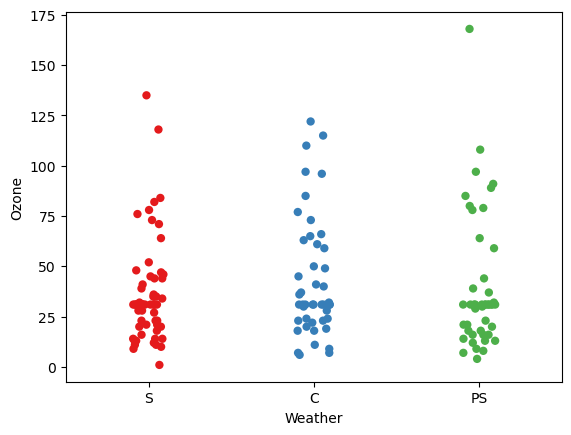

In [42]:
sns.stripplot(data=data1, x ="Weather", y = "Ozone", color="orange", palette="Set1", size=6, jitter= True)
#sns.stripplot(data=data1, x="Weather", y="Ozone", palette="Set1", size=6, jitter=True)


<Axes: xlabel='Ozone', ylabel='Density'>

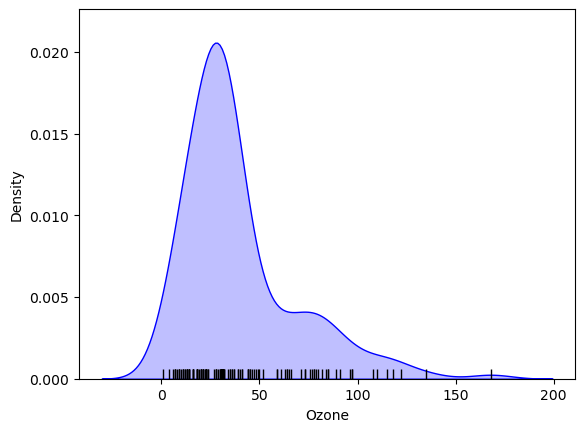

In [43]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

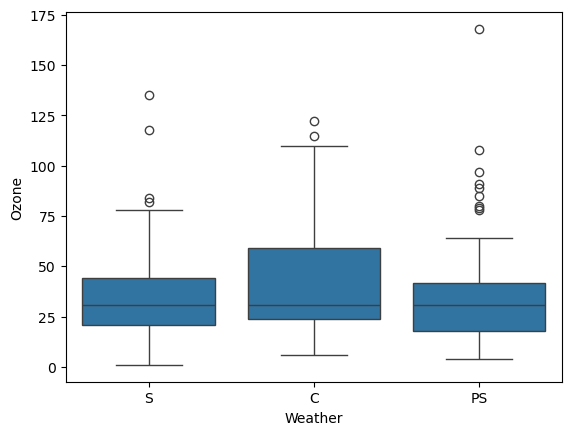

In [44]:
# category wise boxplot for ozone
sns.boxplot(data = data1,x="Weather", y="Ozone")

In [45]:
# for the scatter plot
# there will be no touching of the points


# correlation coefficient and pairs plots

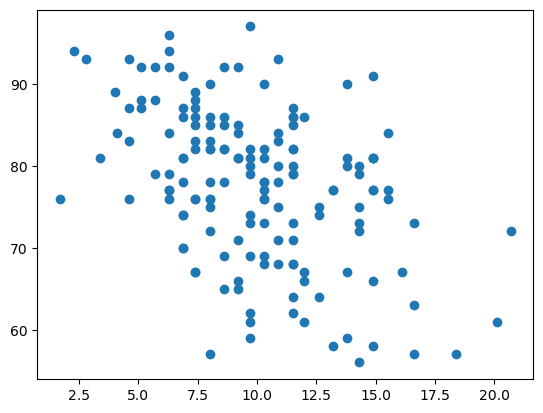

In [47]:
plt.scatter(data1["Wind"],data1["Temp"])

In [48]:
# compute pearson correlation coefficient
# between wind speed and Temerature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

#### Observation
- The correlation between wind and temp is observed to be negatively correlated with mild strength

In [94]:
# read all numeric (float)  columns into a new table data_numeric
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.000000,7.4,67
1,36.0,118.000000,8.0,72
2,12.0,149.000000,12.6,74
3,18.0,313.000000,11.5,62
4,31.0,41.815126,14.3,56
...,...,...,...,...
152,20.0,223.000000,11.5,68
153,41.0,190.000000,7.4,67
154,30.0,193.000000,6.9,70
155,31.0,145.000000,13.2,77


In [96]:
# print correlation coefficients for all the above columns
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,0.281113,-0.523738,0.597087
Solar,0.281113,1.000000,-0.034285,0.282027
Wind,-0.523738,-0.034285,1.000000,-0.441228
Temp,0.597087,0.282027,-0.441228,1.000000


##  observations
- the highest correlation is between ozone and temp that is 0.597087
- the 2nd highest correlation is between ozone and wind that is -0.523738
- the 3rd highest correlation is between ozone wind and temp that is -0.441228
- the least correlation strength is observed between solar and wind (-0.055874)

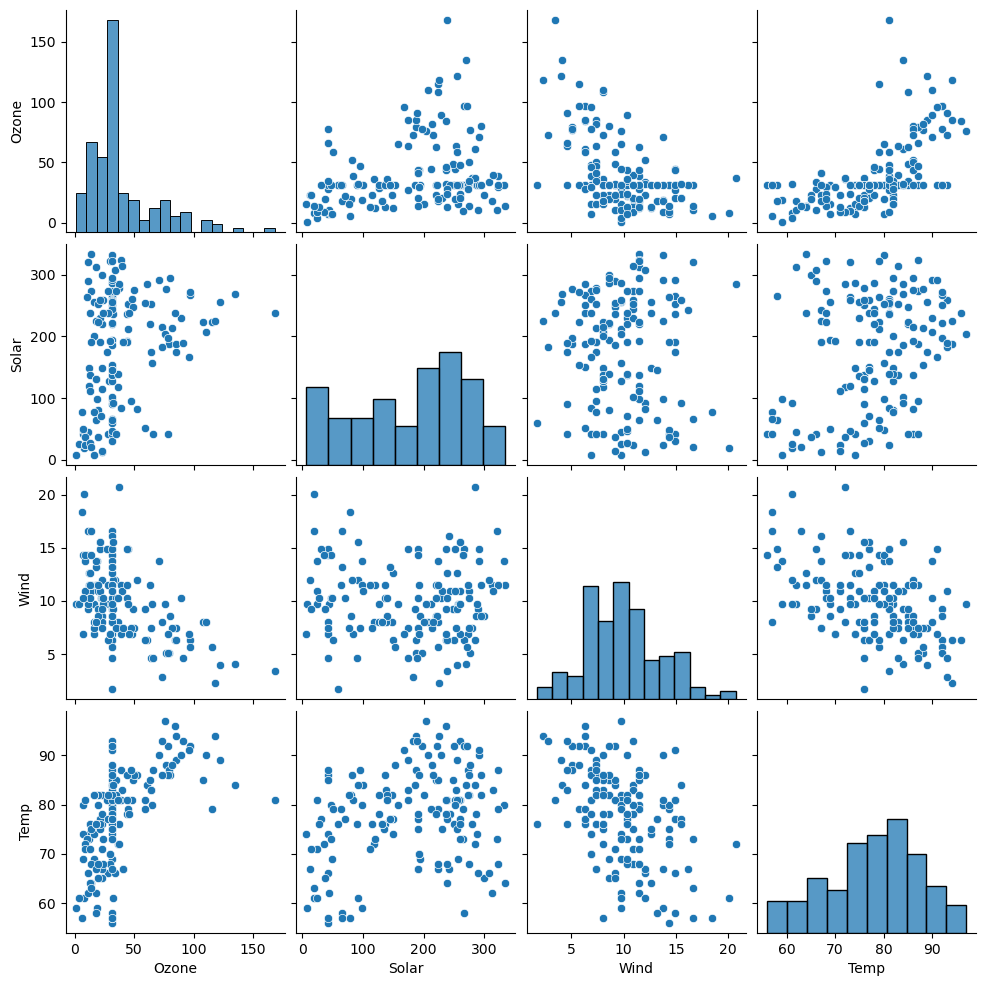

In [103]:
# plot a pair plot betwen all numeric columns using seaborn
sns.pairplot(data1_numeric)

# Transformations

In [117]:
# creating dummy variable for weather column
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.000000,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,118.000000,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,149.000000,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,313.000000,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,31.0,41.815126,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,30,2010,68,False,False,False,False,True,False,False,True
153,41.0,190.000000,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,193.000000,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,31.0,145.000000,13.2,27,2010,77,False,False,False,False,True,False,False,True


# Normalization of the data

In [122]:
data1_numeric.values

array([[ 41.        , 190.        ,   7.4       ,  67.        ],
       [ 36.        , 118.        ,   8.        ,  72.        ],
       [ 12.        , 149.        ,  12.6       ,  74.        ],
       [ 18.        , 313.        ,  11.5       ,  62.        ],
       [ 31.        ,  41.81512605,  14.3       ,  56.        ],
       [ 28.        ,  41.81512605,  14.9       ,  66.        ],
       [ 23.        , 299.        ,   8.6       ,  65.        ],
       [ 19.        ,  99.        ,  13.8       ,  59.        ],
       [  8.        ,  19.        ,  20.1       ,  61.        ],
       [ 31.        , 194.        ,   8.6       ,  69.        ],
       [  7.        ,  41.81512605,   6.9       ,  74.        ],
       [ 16.        , 256.        ,   9.7       ,  69.        ],
       [ 11.        , 290.        ,   9.2       ,  66.        ],
       [ 14.        , 274.        ,  10.9       ,  68.        ],
       [ 18.        ,  65.        ,  13.2       ,  58.        ],
       [ 14.        , 334

In [130]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data1_numeric.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:10,:])

[[0.24 0.56 0.3  0.27]
 [0.21 0.34 0.33 0.39]
 [0.07 0.43 0.57 0.44]
 [0.1  0.94 0.52 0.15]
 [0.18 0.11 0.66 0.  ]
 [0.16 0.11 0.69 0.24]
 [0.13 0.89 0.36 0.22]
 [0.11 0.28 0.64 0.07]
 [0.04 0.04 0.97 0.12]
 [0.18 0.57 0.36 0.32]]
